In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [121]:
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['axes.grid']=False
rcParams['xtick.minor.visible']=True
rcParams['ytick.minor.visible']=True
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'

In [2]:
!ls

RelaxChallenge.ipynb             takehome_user_engagement.csv
relax_data_science_challenge.pdf takehome_users.csv


In [3]:
df = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'])

In [4]:
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
active = []
for uid in df.user_id.unique():
    login_days = df[df.user_id == uid].time_stamp.dt.date.unique()
    if len(login_days) >= 3:
        for i in range(2,len(login_days)):
            if (login_days[i] - login_days[i-2]) <= np.timedelta64(7, 'D'):
                active.append(uid)
                break    

In [6]:
!file -I takehome_users.csv

takehome_users.csv: text/plain; charset=iso-8859-1


In [7]:
users = pd.read_csv('takehome_users.csv', encoding='iso-8859-1', parse_dates=['last_session_creation_time', 'creation_time'])

In [8]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


In [10]:
users = users.drop(columns=['last_session_creation_time'])
users.invited_by_user_id = users.invited_by_user_id.fillna(value=-1)
users.invited_by_user_id = users.invited_by_user_id.astype('int')

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          12000 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 843.9+ KB


In [12]:
users['active'] = users['object_id'].apply(lambda x: x in active)

#create feature for whether user has invited someone else
users['inviter'] = users['object_id'].apply(lambda x: x in users['invited_by_user_id'].unique())

In [13]:
users.head()

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,inviter
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803,False,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316,True,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525,False,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151,False,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240,False,False


In [14]:
users.email = users.email.str.split('@').apply(lambda x: x[1]).str.split('.').apply(lambda x: x[0])

In [15]:
def matching_creating_login_times(obj_id):
    logins = list(df[df.user_id == obj_id].time_stamp.sort_values())
    if len(logins) > 0:
        res = (logins[0] == users[users.object_id == obj_id].creation_time).iloc[0]
    else:
        res = False
        
    return res

In [16]:
users['immediate_login'] = users['object_id'].apply(lambda x: matching_creating_login_times(x))

In [17]:
users.head()

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,inviter,immediate_login
0,1,2014-04-22 03:53:30,Clausen August,yahoo,GUEST_INVITE,1,0,11,10803,False,False,True
1,2,2013-11-15 03:45:04,Poole Matthew,gustr,ORG_INVITE,0,0,1,316,True,False,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,gustr,ORG_INVITE,0,0,94,1525,False,True,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,yahoo,GUEST_INVITE,0,0,1,5151,False,False,False
4,5,2013-01-17 10:14:20,Raw Grace,yahoo,GUEST_INVITE,0,0,193,5240,False,False,False


In [18]:
users = users.drop(columns=['name'])
users.head()

,object_id,creation_time,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,inviter,immediate_login
0,1,2014-04-22 03:53:30,yahoo,GUEST_INVITE,1,0,11,10803,False,False,True
1,2,2013-11-15 03:45:04,gustr,ORG_INVITE,0,0,1,316,True,False,True
2,3,2013-03-19 23:14:52,gustr,ORG_INVITE,0,0,94,1525,False,True,True
3,4,2013-05-21 08:09:28,yahoo,GUEST_INVITE,0,0,1,5151,False,False,False
4,5,2013-01-17 10:14:20,yahoo,GUEST_INVITE,0,0,193,5240,False,False,False


In [19]:
users.email.value_counts().sort_values(ascending=False).head(10)

gmail         3562
yahoo         2447
jourrapide    1259
cuvox         1202
gustr         1179
hotmail       1165
mumdc            2
oqpze            2
rerwl            2
xybhi            2
Name: email, dtype: int64

In [20]:
domains = ['gmail', 'yahoo', 'jourrapide', 'cuvox', 'gustr', 'hotmail']
users['email_domain'] = users.email.apply(lambda x: x if x in domains else 'other')
users = users.drop(columns='email')

In [21]:
users.head()

,object_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,inviter,immediate_login,email_domain
0,1,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,10803,False,False,True,yahoo
1,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,316,True,False,True,gustr
2,3,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1525,False,True,True,gustr
3,4,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,5151,False,False,False,yahoo
4,5,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,5240,False,False,False,yahoo


In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   creation_source             12000 non-null  object        
 3   opted_in_to_mailing_list    12000 non-null  int64         
 4   enabled_for_marketing_drip  12000 non-null  int64         
 5   org_id                      12000 non-null  int64         
 6   invited_by_user_id          12000 non-null  int64         
 7   active                      12000 non-null  bool          
 8   inviter                     12000 non-null  bool          
 9   immediate_login             12000 non-null  bool          
 10  email_domain                12000 non-null  object        
dtypes: bool(3), datetime64[ns](1), int64(5), object(2)
mem

In [23]:
users['creation_year'] = users.creation_time.dt.year
users['creation_month'] = users.creation_time.dt.month

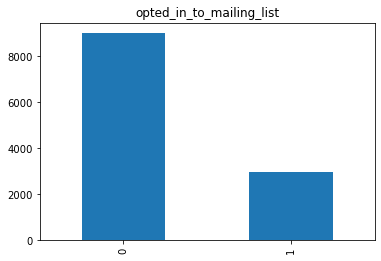

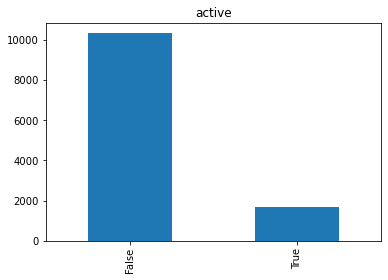

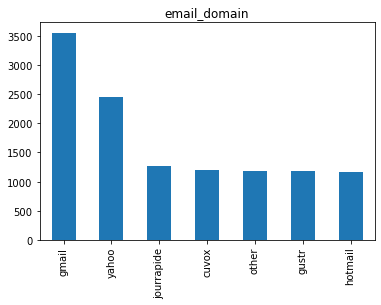

In [24]:
cols = ['opted_in_to_mailing_list', 'active', 'email_domain']

for col in cols:
    users[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

In [126]:
def set_plot(size):
    plt.rc('axes', titlesize=size)     # fontsize of the axes title
    plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=size*0.8)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=size*0.8)    # fontsize of the tick labels
    plt.rc('legend', fontsize=size*0.8)
    
set_plot(16)

Converting input from bool to <class 'numpy.uint8'> for compatibility.
Converting input from bool to <class 'numpy.uint8'> for compatibility.


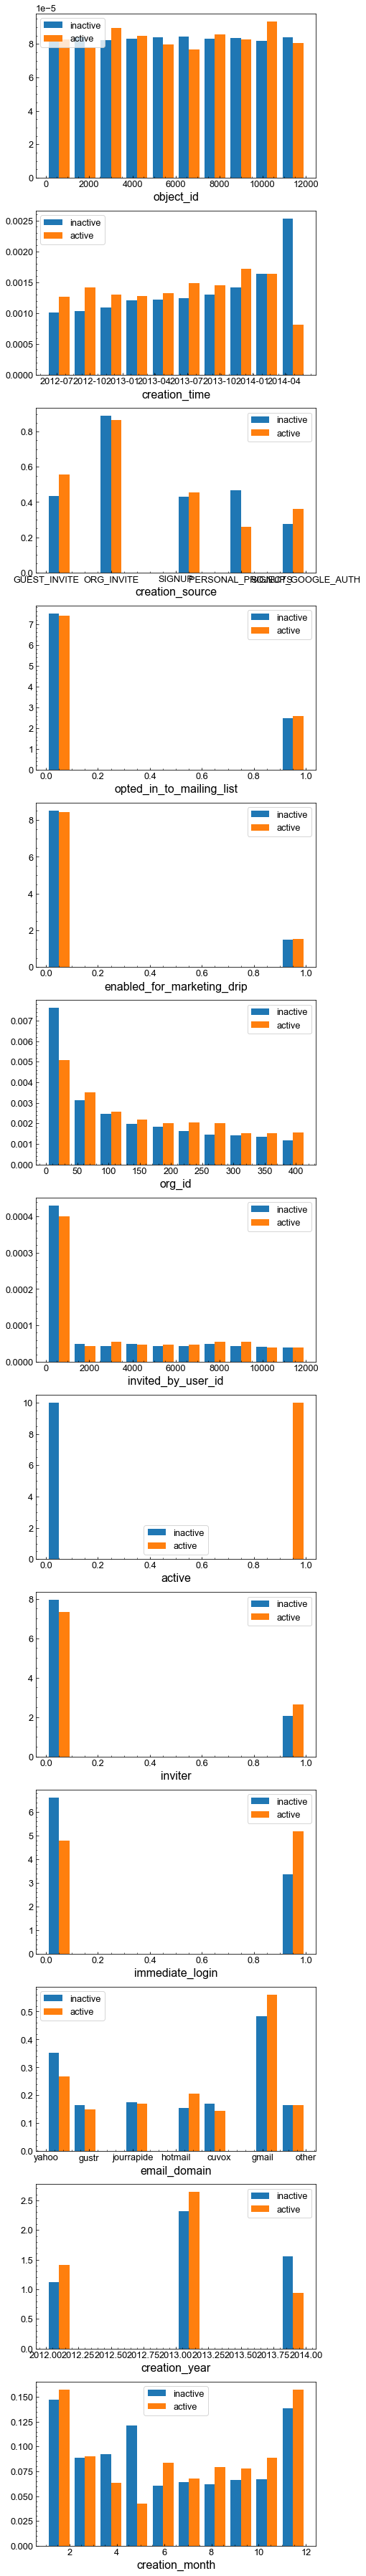

In [127]:
inactive = users[users.active==False]
active = users[users.active==True]

cols = users.columns
fig, axes = plt.subplots(len(cols), figsize=(7, 5*len(cols)))
for ax, col in zip(axes, cols): 
    ax.hist([inactive[col], active[col]], label=['inactive', 'active'], density=True)
    ax.legend()
    ax.set_xlabel(col)
plt.show()

In [79]:
data = pd.get_dummies(users)
data = data.drop(columns=['creation_time', 'object_id'])

In [80]:
data.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,inviter,immediate_login,creation_year,creation_month,creation_source_GUEST_INVITE,...,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,email_domain_cuvox,email_domain_gmail,email_domain_gustr,email_domain_hotmail,email_domain_jourrapide,email_domain_other,email_domain_yahoo
0,1,0,11,10803,False,False,True,2014,4,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,316,True,False,True,2013,11,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,94,1525,False,True,True,2013,3,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,5151,False,False,False,2013,5,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,193,5240,False,False,False,2013,1,1,...,0,0,0,0,0,0,0,0,0,1


In [81]:
data[['active', 'inviter', 'immediate_login']] = data[['active', 'inviter', 'immediate_login']].astype('int')
data.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,inviter,immediate_login,creation_year,creation_month,creation_source_GUEST_INVITE,...,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,email_domain_cuvox,email_domain_gmail,email_domain_gustr,email_domain_hotmail,email_domain_jourrapide,email_domain_other,email_domain_yahoo
0,1,0,11,10803,0,0,1,2014,4,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,316,1,0,1,2013,11,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,94,1525,0,1,1,2013,3,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,5151,0,0,0,2013,5,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,193,5240,0,0,0,2013,1,1,...,0,0,0,0,0,0,0,0,0,1


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   opted_in_to_mailing_list            12000 non-null  int64
 1   enabled_for_marketing_drip          12000 non-null  int64
 2   org_id                              12000 non-null  int64
 3   invited_by_user_id                  12000 non-null  int64
 4   active                              12000 non-null  int64
 5   inviter                             12000 non-null  int64
 6   immediate_login                     12000 non-null  int64
 7   creation_year                       12000 non-null  int64
 8   creation_month                      12000 non-null  int64
 9   creation_source_GUEST_INVITE        12000 non-null  uint8
 10  creation_source_ORG_INVITE          12000 non-null  uint8
 11  creation_source_PERSONAL_PROJECTS   12000 non-null  uint8
 12  crea

In [83]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, precision_recall_fscore_support, plot_precision_recall_curve, balanced_accuracy_score

import xgboost as xgb

In [84]:
X, X_test, y, y_test = train_test_split(data.drop(columns=['active']).values, data.active.values, test_size=0.2)

In [85]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [86]:
# random forest
params = {
 'max_depth': [None, 10, 50, 100],
 'criterion': ['gini', 'entropy'],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 4],
 'min_samples_split': [2, 4, 10],
 'n_estimators': [100, 200, 500, 1000]
}

rf = RandomForestClassifier(random_state=1)
rf_cv = RandomizedSearchCV(rf, params, cv=3, scoring='f1', verbose=5, random_state=1)
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, criterion=entropy, score=0.000, total=   0.9s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, criterion=entropy, score=0.000, total=   0.8s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, criterion=entropy 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, criterion=entropy, score=0.000, total=   0.8s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, criterion=gini 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, criterion=gini, score=0.006, total=   4.3s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, criterion=gini 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.8s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, criterion=gini, score=0.006, total=   4.9s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, criterion=gini 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, criterion=gini, score=0.005, total=   4.6s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, criterion=gini 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, criterion=gini, score=0.029, total=   5.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, criterion=gini 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, criterion=gini, score=0.064, total=   6.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 4],
                                        'min_samples_split': [2, 4, 10],
                                        'n_estimators': [100, 200, 500, 1000]},
                   random_state=1, scoring='f1', verbose=5)

In [87]:
#examine cv results
pd.DataFrame(rf_cv.cv_results_).sort_values('rank_test_score').T

,2,9,1,0,3,4,5,6,7,8
mean_fit_time,4.6591,7.29348,4.22139,0.772187,3.82476,1.48304,6.36997,9.09732,7.31672,3.42138
std_fit_time,0.912947,0.0539063,0.243809,0.0774885,0.444243,0.112173,0.51958,1.80817,1.04712,0.411408
mean_score_time,0.415916,0.691727,0.366353,0.0573947,0.341796,0.135925,0.568857,0.754547,0.627313,0.263161
std_score_time,0.0233369,0.0877091,0.0128344,0.00701835,0.0151154,0.00174272,0.0626532,0.0243176,0.0409551,0.0190752
param_n_estimators,500,1000,500,100,500,200,1000,1000,1000,500
param_min_samples_split,2,4,10,4,2,4,4,4,10,4
param_min_samples_leaf,1,1,1,4,4,4,4,4,4,4
param_max_features,sqrt,sqrt,auto,auto,auto,sqrt,sqrt,sqrt,sqrt,auto
param_max_depth,50,50,50,10,10,100,10,50,10,10
param_criterion,gini,gini,gini,entropy,gini,gini,entropy,gini,gini,entropy


In [88]:
rf_clf = rf_cv.best_estimator_

rf_clf.fit(X_train, y_train)

y_preds = rf_clf.predict(X_val)

In [89]:
balanced_accuracy_score(y_val, y_preds)

0.5319638777841234

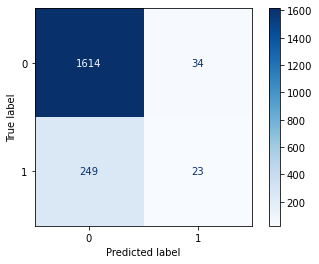

In [90]:
plot_confusion_matrix(rf_clf, X_val, y_val, cmap='Blues')

In [91]:
pd.DataFrame(precision_recall_fscore_support(y_val, y_preds), 
             index=['Precision', 'Recall', 'Fscore', 'Support'])

,0,1
Precision,0.866345,0.403509
Recall,0.979369,0.084559
Fscore,0.919396,0.139818
Support,1648.000000,272.000000


In [92]:
from sklearn.metrics import plot_roc_curve

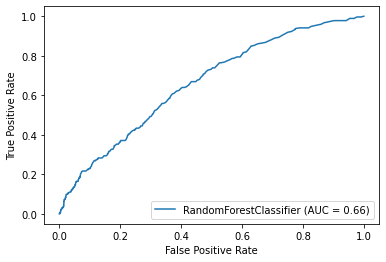

In [93]:
plot_roc_curve(rf_clf, X_val, y_val)

In [94]:
# xgboost

params = {
    'max_depth': [None, 10, 50, 100],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [0.5, 1.0, 3.0, 5.0],
    'gamma': [0, 0.25, 0.5, 1.0],
    'n_estimators': [10, 20, 50, 100],
    'colsample_bytree': [0.5, 0.7, 0.8, 0.9, 1],
    'objective': ['binary:logistic']
}

xgb_clf = xgb.XGBClassifier(random_state=1)
xgb_cv = RandomizedSearchCV(xgb_clf, params, cv=3, scoring='f1', verbose=5, random_state=1)

xgb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] objective=binary:logistic, n_estimators=20, min_child_weight=1.0, max_depth=50, learning_rate=0.001, gamma=0, colsample_bytree=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  objective=binary:logistic, n_estimators=20, min_child_weight=1.0, max_depth=50, learning_rate=0.001, gamma=0, colsample_bytree=1, score=0.090, total=   0.6s
[CV] objective=binary:logistic, n_estimators=20, min_child_weight=1.0, max_depth=50, learning_rate=0.001, gamma=0, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  objective=binary:logistic, n_estimators=20, min_child_weight=1.0, max_depth=50, learning_rate=0.001, gamma=0, colsample_bytree=1, score=0.120, total=   0.4s
[CV] objective=binary:logistic, n_estimators=20, min_child_weight=1.0, max_depth=50, learning_rate=0.001, gamma=0, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV]  objective=binary:logistic, n_estimators=20, min_child_weight=1.0, max_depth=50, learning_rate=0.001, gamma=0, colsample_bytree=1, score=0.101, total=   0.5s
[CV] objective=binary:logistic, n_estimators=100, min_child_weight=3.0, max_depth=50, learning_rate=0.2, gamma=0, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s


[CV]  objective=binary:logistic, n_estimators=100, min_child_weight=3.0, max_depth=50, learning_rate=0.2, gamma=0, colsample_bytree=0.5, score=0.096, total=   2.2s
[CV] objective=binary:logistic, n_estimators=100, min_child_weight=3.0, max_depth=50, learning_rate=0.2, gamma=0, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s remaining:    0.0s


[CV]  objective=binary:logistic, n_estimators=100, min_child_weight=3.0, max_depth=50, learning_rate=0.2, gamma=0, colsample_bytree=0.5, score=0.079, total=   1.9s
[CV] objective=binary:logistic, n_estimators=100, min_child_weight=3.0, max_depth=50, learning_rate=0.2, gamma=0, colsample_bytree=0.5 
[CV]  objective=binary:logistic, n_estimators=100, min_child_weight=3.0, max_depth=50, learning_rate=0.2, gamma=0, colsample_bytree=0.5, score=0.097, total=   1.3s
[CV] objective=binary:logistic, n_estimators=10, min_child_weight=5.0, max_depth=None, learning_rate=0.1, gamma=0, colsample_bytree=0.9 
[CV]  objective=binary:logistic, n_estimators=10, min_child_weight=5.0, max_depth=None, learning_rate=0.1, gamma=0, colsample_bytree=0.9, score=0.000, total=   0.1s
[CV] objective=binary:logistic, n_estimators=10, min_child_weight=5.0, max_depth=None, learning_rate=0.1, gamma=0, colsample_bytree=0.9 
[CV]  objective=binary:logistic, n_estimators=10, min_child_weight=5.0, max_depth=None, learning_

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   13.6s finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [95]:
#examine cv results
pd.DataFrame(xgb_cv.cv_results_).sort_values('rank_test_score').T

,0,1,5,3,7,4,8,2,6,9
mean_fit_time,0.503588,1.7413,0.645778,0.151902,0.174584,0.0967519,0.0938267,0.0689116,0.712173,0.187317
std_fit_time,0.071556,0.373638,0.0196535,0.112179,0.0710239,0.00951545,0.020028,0.00493834,0.0262442,0.0138078
mean_score_time,0.00757726,0.0306949,0.0145513,0.00863131,0.00819747,0.00750232,0.00792543,0.00683586,0.0124303,0.00711473
std_score_time,0.000336364,0.0102218,0.00385895,0.00209536,0.000667189,0.000291728,0.000880153,0.000253594,0.000520717,0.000156755
param_objective,binary:logistic,binary:logistic,binary:logistic,binary:logistic,binary:logistic,binary:logistic,binary:logistic,binary:logistic,binary:logistic,binary:logistic
param_n_estimators,20,100,100,10,10,20,10,10,100,20
param_min_child_weight,1,3,3,3,0.5,3,0.5,5,5,0.5
param_max_depth,50,50,None,None,None,None,10,None,None,None
param_learning_rate,0.001,0.2,0.2,0.01,0.3,0.3,0.1,0.1,0.001,0.01
param_gamma,0,0,0,0,1,0.5,0,0,0.25,0.25


In [96]:
xgb_clf = xgb_cv.best_estimator_

xgb_clf.fit(X_train, y_train)

y_preds = xgb_clf.predict(X_val)

In [97]:
balanced_accuracy_score(y_val, y_preds)

0.5222729868646487

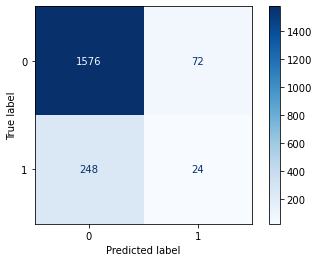

In [98]:
plot_confusion_matrix(xgb_clf, X_val, y_val, cmap='Blues')

In [99]:
pd.DataFrame(precision_recall_fscore_support(y_val, y_preds), 
             index=['Precision', 'Recall', 'Fscore', 'Support'])

,0,1
Precision,0.864035,0.250000
Recall,0.956311,0.088235
Fscore,0.907834,0.130435
Support,1648.000000,272.000000


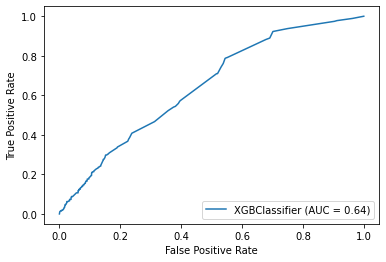

In [100]:
plot_roc_curve(xgb_clf, X_val, y_val)

### Model selection / final evaluation

In [106]:
#xgb classifier is slightly better than the rf classifier, train on full training set

rf_clf = rf_cv.best_estimator_

rf_clf.fit(X, y)

y_preds = rf_clf.predict(X_test) 

In [107]:
balanced_accuracy_score(y_test, y_preds)

0.5140237391671426

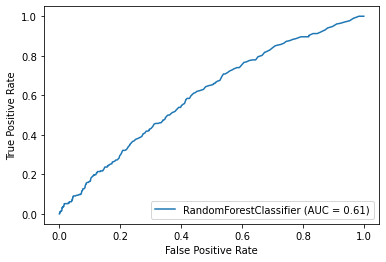

In [108]:
plot_roc_curve(rf_clf, X_test, y_test)

In [115]:
X_sample = X_test[::10,:]

In [116]:
import shap

explainer = shap.Explainer(rf_clf.predict, X_sample)
shap_values = explainer(X_sample)



Permutation explainer:   0%|          | 8/2400 [02:11<29:11:06, 43.92s/it]
Permutation explainer: 241it [10:39,  2.69s/it]                         


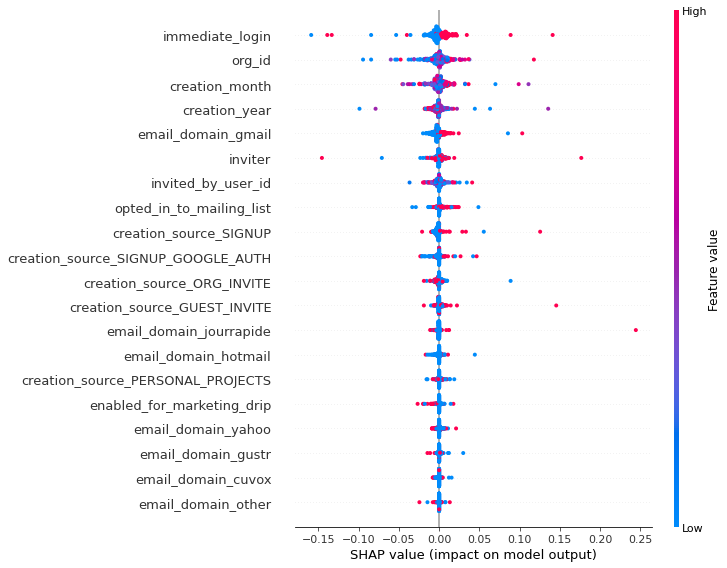

In [117]:
feature_names = data.drop(columns='active').columns
shap_values.feature_names = feature_names

shap.plots.beeswarm(shap_values)